## T1-1. 이상치를 찾아라(IQR활용) Expected Questions

### Q. 데이터에서 IQR을 활용해 Fare컬럼의 이상치를 찾고, 이상치 데이터의 여성 수를 구하시오

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np
df = pd.read_csv('data/BDC/titanic/train.csv')

In [2]:
# 간단한 탐색적 데이터 분석 (EDA)
print(df.shape)
print(df.isnull().sum())
df.head()

(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# IQR 구하기
Q1 = df['Fare'].quantile(.25)
Q3 = df['Fare'].quantile(.75)

# numpy 활용시
# Q1 = np.percentile(df['Fare'], 25)
# Q3 = np.percentile(df['Fare'], 75)

IQR = Q3 - Q1
Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

(-26.724, 65.6344)

In [4]:
# 이상치 데이터 구하기
outdata1 = df[df['Fare']<(Q1 - 1.5 * IQR)]
outdata2 = df[df['Fare']>(Q3 + 1.5 * IQR)]
len(outdata1), len(outdata2)

(0, 116)

In [5]:
# 이상치 데이터에서 여성 수 구하기, 출력하기 print()
print(sum(outdata2['Sex'] == 'female'))

70


## T1-2. 이상치를 찾아라(소수점 나이) Expected Questions

### Q. 주어진 데이터에서 이상치(소수점 나이)를 찾고 올림, 내림, 버림(절사)했을때 3가지 모두 이상치 'age' 평균을 구한 다음 모두 더하여 출력하시오

In [9]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [10]:
# 소수점 데이터 찾기
df = df[(df['age']-np.floor(df['age']))!= 0]
df

,id,age,city,f1,f2,f3,f4,f5
6,id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378
8,id09,3.3,서울,35.0,2,NaN,ESFJ,17.252986
21,id22,-6.3,부산,72.0,1,NaN,ENFP,52.667078
28,id29,-13.5,부산,47.0,2,NaN,ENTP,67.886373
46,id47,34.6,대구,75.0,1,NaN,ESTJ,90.496999
64,id65,26.5,경기,NaN,0,NaN,ISFP,91.297791
84,id85,83.6,경기,55.0,0,NaN,INFJ,80.138280
92,id93,21.8,경기,57.0,0,NaN,ISFP,73.586397


In [11]:
# 이상치를 포함한 데이터 올림, 내림, 버림의 평균값 

# 올림
m_ceil = np.ceil(df['age']).mean()

# 내림
m_floor = np.floor(df['age']).mean()

# 버림
m_trunc = np.trunc(df['age']).mean()

m_ceil, m_floor, m_trunc

(23.75, 22.75, 23.0)

In [12]:
# 평균값 더한 다음 출력
print(m_ceil + m_floor + m_trunc)

69.5


## T1-3. 결측치 처리(map 활용) Expected Questions

### Q. 주어진 데이터에서 결측치가 80%이상 되는 컬럼은(변수는) 삭제하고, 80% 미만인 결측치가 있는 컬럼은 'city'별 중앙값으로 값을 대체하고 'f1'컬럼의 평균값을 출력하세요!

In [13]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [14]:
# EDA - 결측값 확인
df.isnull().sum()

id       0
age      0
city     0
f1      31
f2       0
f3      95
f4       0
f5       0
dtype: int64

In [15]:
# 데이터 shape
df.shape

(100, 8)

In [16]:
# EDA - 결측비율 확인
df.isnull().sum()/df.shape[0]

id      0.00
age     0.00
city    0.00
f1      0.31
f2      0.00
f3      0.95
f4      0.00
f5      0.00
dtype: float64

In [17]:
# f3 컬럼 삭제
print("삭제 전:", df.shape)
df = df.drop(['f3'], axis=1)
print("삭제 후:", df.shape)

# 결측치가 있는 컬럼을 제거하는 2가지 방법
# df.drop(['B', 'C'], axis=1)
# df.drop(columns=['B', 'C'])

삭제 전: (100, 8)
삭제 후: (100, 7)


In [18]:
# 도시 확인
df['city'].unique()

array(['서울', '부산', '대구', '경기'], dtype=object)

In [19]:
# 도시별 중앙값 계산
s=df[df['city']=='서울']['f1'].median()
k=df[df['city']=='경기']['f1'].median()
b=df[df['city']=='부산']['f1'].median()
d=df[df['city']=='대구']['f1'].median()
s, k, b, d

#방법2
# k, d, b, s = df.groupby('city')['f1'].median()

(68.0, 58.0, 62.0, 75.0)

In [20]:
# 대체 전 데이터 샘플 출력
df[18:21]

,id,age,city,f1,f2,f4,f5
18,id19,53.0,서울,NaN,0,ISFP,83.685380
19,id20,11.0,서울,51.0,1,INTJ,91.297791
20,id21,90.0,부산,NaN,1,ISFP,29.269869


In [21]:
# f1결측치 city별 중앙값으로 대체
df['f1'] = df['f1'].fillna(df['city'].map({'서울':s,'경기':k,'부산':b,'대구':d}))

# 만약 그냥 f1 중앙값으로 대체 한다면 
# df['f1'] = df['f1'].fillna(df['f1'].median())

In [22]:
# 대체 후 데이터 샘플 출력
df[18:21]

,id,age,city,f1,f2,f4,f5
18,id19,53.0,서울,68.0,0,ISFP,83.685380
19,id20,11.0,서울,51.0,1,INTJ,91.297791
20,id21,90.0,부산,62.0,1,ISFP,29.269869


In [23]:
#결과 출력
print(df['f1'].mean())

65.52


## T1-4. 왜도와 첨도 구하기 (로그스케일) Expected Questions

### Q. 주어진 데이터 중 train.csv에서 'SalePrice'컬럼의 왜도와 첨도를 구한 값과, 'SalePrice'컬럼을 스케일링(log1p)로 변환한 이후 왜도와 첨도를 구해 모두 더한 다음 소수점 2째자리까지 출력하시오

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

In [2]:
# 데이터 불러오기
df = pd.read_csv("data/BDC/house-prices-advanced-regression-techniques/train.csv")
df['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

<AxesSubplot:>

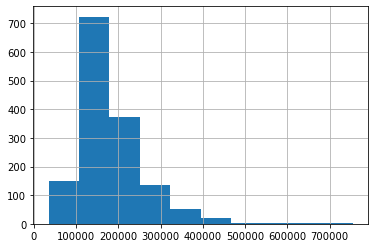

In [3]:
# EDA (시험에서는 시각화 불가)
df['SalePrice'].hist()

In [4]:
# 'SalePrice'컬럼 왜도와 첨도계산
s1 = df['SalePrice'].skew()
k1 = df['SalePrice'].kurt()
print("왜도:" ,s1)
print("첨도:" ,k1)

왜도: 1.8828757597682129
첨도: 6.536281860064529


In [5]:
# 'SalePrice'컬럼 로그변환
df['SalePrice'] = np.log1p(df['SalePrice'])

<AxesSubplot:>

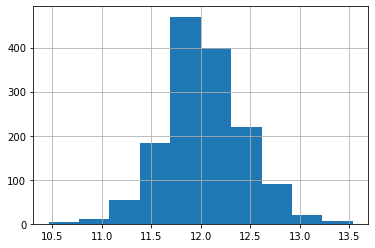

In [6]:
# EDA (시험에서는 시각화 불가)
df['SalePrice'].hist()

In [7]:
# 'SalePrice'컬럼 왜도와 첨도계산
s2 = df['SalePrice'].skew()
k2 = df['SalePrice'].kurt()
print("왜도:" ,s2)
print("첨도:" ,k2)

왜도: 0.12134661989685329
첨도: 0.809519155707878


In [8]:
# 모두 더한 다음 출력
print(round(s1+s2+k1+k2,2))

9.35


## T1-5. 조건에 맞는 데이터 표준편차 구하기 Expected Questions

### Q. 주어진 데이터 중 basic1.csv에서 'f4'컬럼 값이 'ENFJ'와 'INFP'인 'f1'의 표준편차 차이를 절대값으로 구하시오

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [2]:
# 조건에 맞는 데이터
df[df['f4']=='ENFJ']

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
32,id33,47.0,부산,94.0,0,NaN,ENFJ,17.252986
40,id41,81.0,대구,55.0,0,NaN,ENFJ,37.113739
44,id45,97.0,대구,88.0,0,NaN,ENFJ,13.049921
53,id54,53.0,대구,NaN,1,NaN,ENFJ,69.730313


In [3]:
df[df['f4']=='ENFJ']['f1'].std()

17.727097901235837

In [4]:
# 조건에 맞는 f1의 표준편차
enfj = df[df['f4']=='ENFJ']['f1'].std()
enfj

17.727097901235837

In [5]:
# 조건에 맞는 f1의 표준편차
infp = df[df['f4']=='INFP']['f1'].std()
infp

23.586719427112648

In [6]:
# 두 표준편차 차이 절대값 출력
print(np.abs(enfj - infp))

5.859621525876811


## T1-6. 결측치 제거 및 그룹 합계 Expected Questions

### Q. 주어진 데이터 중 basic1.csv에서 'f1'컬럼 결측 데이터를 제거하고, 'city'와 'f2'을 기준으로 묶어 합계를 구하고, 'city가 경기이면서 f2가 0'인 조건에 만족하는 f1 값을 구하시오

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [2]:
# f1컬럼 결측치 제거
df = df[~df['f1'].isnull()]

In [3]:
# 그룹 합계 계산
df2 = df.groupby(['city','f2']).sum()
df2

age     f1          f5
city f2                          
경기   0   720.4  833.0  943.944823
     1   696.0  670.0  657.241212
     2   239.0  311.0  362.300060
대구   0   387.0  527.0  183.199568
     1   217.6  235.0  241.333824
     2   140.0  211.0   79.667919
부산   0   331.0  389.0  284.371097
     1   188.7  315.0  299.270973
     2   -13.5   47.0   67.886373
서울   0   145.0  278.0  218.528577
     1   315.3  534.0  438.485010
     2    68.3  207.0  126.661135

In [4]:
# 조건에 맞는 값 출력
print(df2.iloc[0]['f1'])

833.0


## T1-7. 값 변경 및 2개 이상의 조건 Expected Questions

### Q. 'f4'컬럼의 값이 'ESFJ'인 데이터를 'ISFJ'로 대체하고, 'city'가 '경기'이면서 'f4'가 'ISFJ'인 데이터 중 'age'컬럼의 최대값을 출력하시오!

In [5]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [6]:
# ESFJ 값을 가진 데이터 확인
df[df['f4'] == 'ESFJ']

,id,age,city,f1,f2,f3,f4,f5
8,id09,3.3,서울,35.0,2,NaN,ESFJ,17.252986
12,id13,15.0,서울,68.0,0,NaN,ESFJ,83.685380
30,id31,86.0,부산,77.0,0,NaN,ESFJ,73.586397
58,id59,64.0,대구,NaN,1,NaN,ESFJ,20.129444
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [7]:
# 값 변경하기
df['f4'] = df['f4'].replace('ESFJ', 'ISFJ')

In [8]:
# ESFJ 값을 가진 데이터 확인
df[df['f4'] == 'ESFJ']

,id,age,city,f1,f2,f3,f4,f5


In [9]:
# 2개의 조건에 맞는 값
df[(df['f4'] == 'ISFJ') & (df['city'] == '경기')]

,id,age,city,f1,f2,f3,f4,f5
62,id63,88.0,경기,86.0,1,NaN,ISFJ,73.586397
66,id67,66.0,경기,52.0,1,NaN,ISFJ,73.586397
72,id73,90.0,경기,NaN,1,NaN,ISFJ,73.586397
80,id81,86.0,경기,50.0,1,NaN,ISFJ,37.113739
98,id99,1.0,경기,47.0,0,NaN,ISFJ,97.381034


In [10]:
# 2개의 조건에 맞는 값중 age컬럼의 최대값
df[(df['f4'] == 'ISFJ') & (df['city'] == '경기')]['age'].max()

90.0

## T1-8. 누적합 그리고 보간(결측치 처리) Expected Questions
### Q. 주어진 데이터 셋에서 'f2' 컬럼이 1인 조건에 해당하는 데이터의 'f1'컬럼 누적합을 계산한다. 이때 발생하는 누적합 결측치는 바로 뒤의 값을 채우고, 누적합의 평균값을 출력한다. (단, 결측치 바로 뒤의 값이 없으면 다음에 나오는 값을 채워넣는다)

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [2]:
# 조건에 따른 누적합
df2 = df[df['f2']==1]['f1'].cumsum()
df2

1       70.0
2      131.0
6      191.0
7      292.0
9      366.0
13     416.0
14     483.0
16       NaN
19     534.0
20       NaN
21     606.0
22     681.0
25     738.0
27     772.0
33       NaN
35     849.0
37       NaN
46     924.0
49    1002.0
51    1084.0
53       NaN
55       NaN
58       NaN
62    1170.0
65       NaN
66    1222.0
69    1318.0
72       NaN
77    1414.0
80    1464.0
82    1514.0
86       NaN
88    1580.0
91    1658.0
93       NaN
94    1701.0
95    1754.0
Name: f1, dtype: float64

In [3]:
# 결측치 처리 (뒤에 나오는 값으로 채움)
df2 = df2.fillna(method = 'bfill')
df2

1       70.0
2      131.0
6      191.0
7      292.0
9      366.0
13     416.0
14     483.0
16     534.0
19     534.0
20     606.0
21     606.0
22     681.0
25     738.0
27     772.0
33     849.0
35     849.0
37     924.0
46     924.0
49    1002.0
51    1084.0
53    1170.0
55    1170.0
58    1170.0
62    1170.0
65    1222.0
66    1222.0
69    1318.0
72    1414.0
77    1414.0
80    1464.0
82    1514.0
86    1580.0
88    1580.0
91    1658.0
93    1701.0
94    1701.0
95    1754.0
Name: f1, dtype: float64

In [4]:
# 평균 출력
print(df2.mean())

980.3783783783783


## T1-9. 수치형 변수 표준화 Expected Questions

### Q. 주어진 데이터에서 'f5'컬럼을 표준화(Standardization (Z-score Normalization))하고 그 중앙값을 구하시오

In [5]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head(2)

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826


In [6]:
# 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['f5']=scaler.fit_transform(df[['f5']])
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,1.220815
1,id02,9.0,서울,70.0,1,NaN,ENFJ,0.127343
2,id03,27.0,서울,61.0,1,NaN,ISTJ,-1.394535
3,id04,75.0,서울,NaN,2,NaN,INFP,-0.143667
4,id05,24.0,서울,85.0,2,NaN,ISFJ,-0.970085


In [7]:
# 중앙값 출력
print(df['f5'].median())

0.260619629559015


## T1-10. 여-존슨과 박스-칵스 변환 Expected Questions

### Q. 주어진 데이터에서 20세 이상인 데이터를 추출하고 'f1'컬럼을 결측치를 최빈값으로 채운 후, f1 컬럼의 여-존슨과 박스콕스 변환 값을 구하고, 두 값의 차이를 절대값으로 구한다음 모두 더해 소수점 둘째 자리까지 출력(반올림)하시오

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np
from sklearn.preprocessing import power_transform

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [2]:
# 조건에 맞는 데이터
print("조건 적용 전:", df.shape)
df = df[df['age']>=20]
print("조건 적용 후:", df.shape)

조건 적용 전: (100, 8)
조건 적용 후: (83, 8)


In [3]:
# 최빈값으로 'f1' 컬럼 결측치 대체
print("결측치 처리 전: \n", df.isnull().sum())
print("최빈값: ",df['f1'].mode()[0])
df['f1'] = df['f1'].fillna(df['f1'].mode()[0])
print("결측치 처리 후: \n", df.isnull().sum())  

결측치 처리 전: 
 id       0
age      0
city     0
f1      26
f2       0
f3      78
f4       0
f5       0
dtype: int64
최빈값:  50.0
결측치 처리 후: 
 id       0
age      0
city     0
f1       0
f2       0
f3      78
f4       0
f5       0
dtype: int64


In [4]:
# 'f1'데이터 여-존슨 yeo-johnson 값 구하기
df['y'] = power_transform(df[['f1']]) # method 디폴트 값은 여-존슨’yeo-johnson’
df['y'].head()

2    0.101083
3   -0.585402
4    1.463459
5   -0.143094
6    0.040578
Name: y, dtype: float64

In [5]:
# 'f1'데이터 여-존슨 yeo-johnson 값 구하기
df['y'] = power_transform(df[['f1']],standardize=False) # method 디폴트 값은 여-존슨’yeo-johnson’
df['y'].head()

2    20.583423
3    17.968081
4    25.773745
5    19.653167
6    20.352915
Name: y, dtype: float64

In [6]:
# 'f1'데이터 박스-콕스 box-cox 값 구하기
df['b'] = power_transform(df[['f1']], method='box-cox')
df['b'].head()

2    0.100290
3   -0.585656
4    1.463969
5   -0.143784
6    0.039801
Name: b, dtype: float64

In [7]:
# 'f1'데이터 박스-콕스 box-cox 값 구하기
# 추가 2022.6.21 
# standardize=False는 python과 R의 디폴트가 달라 결과를 맞추기 위함이었어요! 이번 문제는 출제 가능성이 낮아 보여요 (이미 풀이한 분들이 있어 그대로 두었습니다.)
df['b'] = power_transform(df[['f1']], method='box-cox', standardize=False)
df['b'].head()

2    21.067090
3    18.305263
4    26.557680
5    20.084373
6    20.823545
Name: b, dtype: float64

In [8]:
## 박스콕스 방법2
from scipy import stats
x = stats.boxcox(df['f1'])
x

(array([21.06708963, 18.30526339, 26.55768035, 20.08437308, 20.82354518,
        29.92014531, 24.11822145, 22.73510574, 18.30526339, 18.30526339,
        22.50057067, 26.55768035, 18.30526339, 26.98922326, 18.30526339,
        18.30526339, 24.34492284, 16.71079154, 18.30526339, 20.08437308,
        20.82354518, 13.87430354, 24.79522903, 21.78961595, 28.47348934,
        18.30526339, 18.30526339, 24.79522903, 18.30526339, 18.30526339,
        18.30526339, 24.34492284, 19.58413906, 17.78149172, 20.82354518,
        18.30526339, 27.20371231, 18.30526339, 24.34492284, 27.20371231,
        25.01886992, 18.30526339, 25.90374858, 18.30526339, 18.30526339,
        21.55009593, 18.30526339, 18.30526339, 18.30526339, 21.30926334,
        18.30526339, 26.77388371, 21.30926334, 18.30526339, 18.30526339,
        18.8218693 , 16.98150238, 26.55768035, 26.34059949, 18.30526339,
        29.30451942, 17.51679388,  6.25392523, 12.96923731, 28.89049464,
        18.30526339, 20.82354518, 18.30526339, 18.3

In [9]:
# 두 값의 차이를 절대값으로 구한다음 모두 더해 소수점 둘째 자리까지 출력(반올림)
round(sum(np.abs(df['y'] - df['b'])),2)

39.17

## T1-11. min-max 기준 상하위 5%값 Expected Questions

### Q. 주어진 데이터에서 'f5'컬럼을 min-max 스케일 변환한 후, 상위 5%와 하위 5% 값의 합을 구하시오

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [2]:
#결측치 확인
print(df.isnull().sum())

id       0
age      0
city     0
f1      31
f2       0
f3      95
f4       0
f5       0
dtype: int64


In [3]:
# min-max scale 방법1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['f5_1'] = scaler.fit_transform(df[['f5']])

In [4]:
# min-max scale 방법2
df['f5_2'] = df['f5'].transform(lambda x: ((x - x.min()) / (x.max() - x.min())))

In [5]:
# 방법1과 2 비교
print(df.head())

     id   age city    f1  f2   f3    f4         f5      f5_1      f5_2
0  id01   2.0   서울   NaN   0  NaN  ENFJ  91.297791  0.919533  0.919533
1  id02   9.0   서울  70.0   1  NaN  ENFJ  60.339826  0.570252  0.570252
2  id03  27.0   서울  61.0   1  NaN  ISTJ  17.252986  0.084129  0.084129
3  id04  75.0   서울   NaN   2  NaN  INFP  52.667078  0.483685  0.483685
4  id05  24.0   서울  85.0   2  NaN  ISFJ  29.269869  0.219708  0.219708


In [7]:
# 하위 5%, 상위 5% 값 구하기
lower = df['f5_1'].quantile(0.05)
print('하위 5%:', lower)

upper = df['f5_1'].quantile(0.95)
print('상위 5%:', upper)

print('하위 5% + 상위 5%:', lower + upper)

하위 5%: 0.03670782406038746
상위 5%: 0.9881662742993513
하위 5% + 상위 5%: 1.0248740983597389


## T1-12. 상위 10개, 하위 10개 차이 Expected Questions

### Q. 주어진 데이터에서 상위 10개 국가의 접종률 평균과 하위 10개 국가의 접종률 평균을 구하고, 그 차이를 구해보세요. (단, 100%가 넘는 접종률 제거, 소수 첫째자리까지 출력)

In [8]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/covid-vaccination-vs-death/covid-vaccination-vs-death_ratio.csv')
df.head()

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40295077.0,1.113977
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40295077.0,1.167242
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40295077.0,1.182197
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40295077.0,1.189654
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40295077.0,1.190155


In [9]:
#시간에 따라 접종률이 점점 올라감
df2 = df.groupby('country').max()
df2 = df2.sort_values(by='ratio', ascending = False)
# print(df2['ratio'].head())

In [10]:
#이상치 제거
df2 = df2[1:]
# print(df2['ratio'].head())

In [11]:
#상위 10개 데이터 평균
top = df2['ratio'].head(10).mean()
bottom = df2['ratio'].tail(10).mean()

In [12]:
print(round(top - bottom,1))

88.4


## T1-13. 상관관계 구하기 Expected Questions

### Q. 주어진 데이터에서 상관관계를 구하고, quality와의 상관관계가 가장 큰 값과, 가장 작은 값을 구한 다음 더하시오! 단, quality와 quality 상관관계 제외, 소수점 둘째 자리까지 출력

In [1]:
import pandas as pd
import numpy as np

# 데이터 불러오기
df = pd.read_csv("data/BDC/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
#print(df.head())

In [2]:
# 상관관계 구하기 
df_corr = df.corr()
df_corr = df_corr[:-1] # quailiy-quailiy 상관관계 제거
# print(df_corr['quality'])

In [3]:
# 상관관계가 가장 큰 값과 가장 작은 값 (절대값으로 확인)
max_corr=abs(df.corr()['quality'][:-1]).max()  #0.47
min_corr=abs(df.corr()['quality'][:-1]).min()   #0.013

if max_corr not in df.corr()[['quality']][:-1].values:
    max_corr=-max_corr
if min_corr not in df.corr()[['quality']][:-1].values:
    min_corr=-min_corr

In [4]:
ans=round(max_corr+min_corr,2)
print(ans) 

0.49


## T1-14. 2개 조건에 따른 상위 값 Expected Question

### Q. city와 f4를 기준으로 f5의 평균값을 구한 다음, f5를 기준으로 상위 7개 값을 모두 더해 출력하시오 (소수점 둘째자리까지 출력)

In [5]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [6]:
# city와 f4별 f5의 평균 값 (멀티인덱스 출력)
df = df.groupby(['city', 'f4'])[['f5']].mean()
print(df)

                  f5
city f4             
경기   ENTJ  51.693799
     ENTP  54.704075
     ESFJ  97.381034
     ESFP  53.187491
     ESTJ  79.487043
     ESTP  34.022130
     INFJ  80.138280
     INFP  90.531801
     INTJ  80.388795
     INTP  55.887974
     ISFJ  64.468233
     ISFP  69.108148
     ISTP  48.431184
대구   ENFJ  39.964658
     ENFP  32.574085
     ENTP  13.049921
     ESFJ  20.129444
     ESTJ  77.323257
     ESTP  28.915814
     INTP  26.698797
     ISFJ  59.883434
     ISTJ  83.685380
     ISTP  29.269869
부산   ENFJ  17.252986
     ENFP  68.176229
     ENTP  74.012327
     ESFJ  73.586397
     ESTJ  25.280992
     ESTP  62.730150
     INFJ  53.447698
     INFP  48.431184
     INTP  13.049921
     ISFJ  13.049921
     ISFP  29.269869
     ISTP  69.730313
서울   ENFJ  75.818808
     ENFP  98.429899
     ENTJ  67.886373
     ENTP   9.796378
     ESFJ  50.469183
     ESFP  16.283854
     ESTP  91.297791
     INFJ  83.685380
     INFP  52.667078
     INTJ  91.297791
     INTP  20

In [7]:
# dataframe 전환 후 상위 7개 출력
df = df.reset_index().sort_values('f5', ascending=False).head(7)
print(df)

   city    f4         f5
36   서울  ENFP  98.429899
2    경기  ESFJ  97.381034
44   서울  INTJ  91.297791
41   서울  ESTP  91.297791
47   서울  ISFP  91.057640
7    경기  INFP  90.531801
42   서울  INFJ  83.685380


In [8]:
# f7의 합계 (소수점 둘째자리까지)
round(df['f5'].sum(), 2)

643.68

## T1-15. 슬라이싱 & 조건 Expected Question

### Q. 주어진 데이터 셋에서 age컬럼 상위 20개의 데이터를 구한 다음 f1의 결측치를 중앙값으로 채운다. 그리고 f4가 ISFJ와 f5가 20 이상인 f1의 평균값을 출력하시오!

In [9]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [10]:
# 나이 순(내림차순)으로 정렬
df = df.sort_values('age', ascending=False).reset_index(drop=True)
print(df)

      id    age city     f1  f2   f3    f4         f5
0   id97  100.0   경기    NaN   0  NaN  INFP  67.886373
1   id37  100.0   부산    NaN   0  NaN  ESTP  33.308999
2   id45   97.0   대구   88.0   0  NaN  ENFJ  13.049921
3   id52   97.0   대구   82.0   1  NaN  ISFJ  90.496999
4   id92   97.0   경기   78.0   1  NaN  INFP  97.381034
..   ...    ...  ...    ...  ..  ...   ...        ...
95  id99    1.0   경기   47.0   0  NaN  ESFJ  97.381034
96  id58    0.0   대구  100.0   2  NaN  ESTP  33.308999
97  id22   -6.3   부산   72.0   1  NaN  ENFP  52.667078
98  id70   -9.0   경기   96.0   1  NaN  ISTP  48.431184
99  id29  -13.5   부산   47.0   2  NaN  ENTP  67.886373

[100 rows x 8 columns]


In [11]:
# 상위 20개 슬라이싱
df = df[:20]
print(df)

      id    age city    f1  f2   f3    f4         f5
0   id97  100.0   경기   NaN   0  NaN  INFP  67.886373
1   id37  100.0   부산   NaN   0  NaN  ESTP  33.308999
2   id45   97.0   대구  88.0   0  NaN  ENFJ  13.049921
3   id52   97.0   대구  82.0   1  NaN  ISFJ  90.496999
4   id92   97.0   경기  78.0   1  NaN  INFP  97.381034
5   id10   95.0   서울  74.0   1  NaN  ISFP  98.429899
6   id46   93.0   대구   NaN   0  NaN  ESTJ  67.886373
7   id78   92.0   경기  96.0   1  NaN  INTJ  69.730313
8   id96   92.0   경기  53.0   1  NaN  ENTJ  52.667078
9   id73   90.0   경기   NaN   1  NaN  ISFJ  73.586397
10  id21   90.0   부산   NaN   1  NaN  ISFP  29.269869
11  id88   89.0   경기  75.0   0  NaN  ESTJ  60.339826
12  id63   88.0   경기  86.0   1  NaN  ISFJ  73.586397
13  id66   87.0   경기   NaN   1  NaN  ISFP  17.252986
14  id38   87.0   부산   NaN   1  NaN  ESTP  83.685380
15  id61   87.0   경기  62.0   2  NaN  INTP  69.730313
16  id50   86.0   대구  78.0   1  NaN  ENFP  60.339826
17  id81   86.0   경기  50.0   1  NaN  ISFJ  37.

In [12]:
# 결측치 채우기 (중앙값)
df['f1'] = df['f1'].fillna(df['f1'].median())

In [13]:
# 조건 ISFJ, f5가 20이상
cond = (df['f4']=='ISFJ') & (df['f5'] >= 20)

In [14]:
# f1의 평균
df[cond]['f1'].mean()

73.875

## T1-16. 분산 Expected Question

### Q. 주어진 데이터 셋에서 f2가 0값인 데이터를 age를 기준으로 오름차순 정렬하고 앞에서 부터 20개의 데이터를 추출한 후 f1 결측치(최소값)를 채우기 전과 후의 분산 차이를 계산하시오 (소수점 둘째 자리까지)

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [2]:
# f2가 0인 데이터 정렬(age 오름차순)
cond = (df['f2']==0)
df = df[cond].sort_values('age', ascending=True).reset_index(drop=True)

In [3]:
# 앞에서 부터 20개의 데이터 
df = df[:20]

In [4]:
# f1 결측치(최소값)를 채우기 전과 후의 분산
df_var1 = df['f1'].var()
df['f1'] = df['f1'].fillna(df['f1'].min())
df_var2 = df['f1'].var()

In [5]:
# 소수점 둘째자리까지 출력
print(round(df_var1 - df_var2, 2))

38.44


In [6]:
# 추가 설명 판다스와 넘파이 기본값 비교

import numpy as np
print("numpy:", np.var(df['f1']))
print("pandas(ddof=0):",df['f1'].var(ddof=0))

print("pandas:",df['f1'].var())
print("numpy(ddof=1):", np.var(df['f1'], ddof=1))

numpy: 297.6600000000001
pandas(ddof=0): 297.6600000000001
pandas: 313.32631578947377
numpy(ddof=1): 313.32631578947377


## T1-17. 시계열 데이터1 Expected Question

### Q. 2022년 5월 sales의 중앙값을 구하시오

In [7]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic2.csv')
df.head()

,Date,Sales,PV,UV,Events
0,2022-01-01,22711525,397349,4421.0,1
1,2022-01-02,36779,3969,2289.0,0
2,2022-01-03,13943875,373890,NaN,1
3,2022-01-04,8088593,142054,2157.0,0
4,2022-01-05,2395374,190684,NaN,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    730 non-null    object 
 1   Sales   730 non-null    int64  
 2   PV      730 non-null    int64  
 3   UV      684 non-null    float64
 4   Events  730 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 28.6+ KB


In [9]:
# datetime으로 type변경
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    730 non-null    datetime64[ns]
 1   Sales   730 non-null    int64         
 2   PV      730 non-null    int64         
 3   UV      684 non-null    float64       
 4   Events  730 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 28.6 KB


In [10]:
# 새로운 컬럼 추가 (년, 월, 일)
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [11]:
df.head()

,Date,Sales,PV,UV,Events,year,month,day
0,2022-01-01,22711525,397349,4421.0,1,2022,1,1
1,2022-01-02,36779,3969,2289.0,0,2022,1,2
2,2022-01-03,13943875,373890,NaN,1,2022,1,3
3,2022-01-04,8088593,142054,2157.0,0,2022,1,4
4,2022-01-05,2395374,190684,NaN,0,2022,1,5


In [12]:
# 문제 조건에 맞는 값 구하기
cond = (df['year']==2022) & (df['month']==5)
print(df[cond]['Sales'].median())

1477685.0


## T1-18. 시계열 데이터2 Expected Question

### Q. 주어진 데이터에서 2022년 5월 주말과 평일의 sales컬럼 평균값 차이를 구하시오 (소수점 둘째자리까지 출력, 반올림)

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic2.csv', parse_dates=['Date'])

In [2]:
df.head()

,Date,Sales,PV,UV,Events
0,2022-01-01,22711525,397349,4421.0,1
1,2022-01-02,36779,3969,2289.0,0
2,2022-01-03,13943875,373890,NaN,1
3,2022-01-04,8088593,142054,2157.0,0
4,2022-01-05,2395374,190684,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    730 non-null    datetime64[ns]
 1   Sales   730 non-null    int64         
 2   PV      730 non-null    int64         
 3   UV      684 non-null    float64       
 4   Events  730 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 28.6 KB


In [4]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek

df.head()

,Date,Sales,PV,UV,Events,year,month,day,dayofweek
0,2022-01-01,22711525,397349,4421.0,1,2022,1,1,5
1,2022-01-02,36779,3969,2289.0,0,2022,1,2,6
2,2022-01-03,13943875,373890,NaN,1,2022,1,3,0
3,2022-01-04,8088593,142054,2157.0,0,2022,1,4,1
4,2022-01-05,2395374,190684,NaN,0,2022,1,5,2


In [5]:
df['weekend'] = df['dayofweek'].apply(lambda x: x>=5)

df.head()

,Date,Sales,PV,UV,Events,year,month,day,dayofweek,weekend
0,2022-01-01,22711525,397349,4421.0,1,2022,1,1,5,True
1,2022-01-02,36779,3969,2289.0,0,2022,1,2,6,True
2,2022-01-03,13943875,373890,NaN,1,2022,1,3,0,False
3,2022-01-04,8088593,142054,2157.0,0,2022,1,4,1,False
4,2022-01-05,2395374,190684,NaN,0,2022,1,5,2,False


In [6]:
weekend_cond = (df['year']==2022) & (df['month']==5) & (df['weekend'])
weekday_cond = (df['year']==2022) & (df['month']==5) & (~df['weekend'])

In [7]:
weekend = df[weekend_cond]['Sales'].mean()
weekday = df[weekday_cond]['Sales'].mean()

In [8]:
round(weekend - weekday, 1)

3010339.1

## T1-19. 시계열 데이터3 Expected Question

### Q. 주어진 데이터에서 2022년 월별 Sales 합계 중 가장 큰 금액과 2023년 월별 Sales 합계 중 가장 큰 금액의 차이를 절대값으로 구하시오. 단 Events컬럼이 '1'인경우 80%의 Salse값만 반영함

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic2.csv', parse_dates=['Date'])

In [2]:
df.head()

,Date,Sales,PV,UV,Events
0,2022-01-01,22711525,397349,4421.0,1
1,2022-01-02,36779,3969,2289.0,0
2,2022-01-03,13943875,373890,NaN,1
3,2022-01-04,8088593,142054,2157.0,0
4,2022-01-05,2395374,190684,NaN,0


In [3]:
# 날짜 컬럼 생성
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek

In [4]:
# 이벤트가 1인 sales값은 80%만 반영

def event_sales(x):
    if x['Events'] == 1:
        x['Sales2'] = x['Sales']*0.8
    else:
        x['Sales2'] = x['Sales']
    return x


df = df.apply(lambda x: event_sales(x), axis=1) #1일 경우 row, 0일 경우 컬럼
df.head()

,Date,Sales,PV,UV,Events,year,month,day,dayofweek,Sales2
0,2022-01-01,22711525,397349,4421.0,1,2022,1,1,5,18169220.0
1,2022-01-02,36779,3969,2289.0,0,2022,1,2,6,36779.0
2,2022-01-03,13943875,373890,NaN,1,2022,1,3,0,11155100.0
3,2022-01-04,8088593,142054,2157.0,0,2022,1,4,1,8088593.0
4,2022-01-05,2395374,190684,NaN,0,2022,1,5,2,2395374.0


In [5]:
# 2022년 월별 합계 중 가장 큰 값
cond = df['year'] == 2022
df1 = df[cond]
sale1 = df1.groupby('month')['Sales2'].sum().max()
sale1

197145878.0

In [6]:
# 2023년 월별 합계 중 가장 큰 값
cond = df['year'] == 2023
df2 = df[cond]
sale2 = df2.groupby('month')['Sales2'].sum().max()
sale2

239619313.8

In [7]:
# 결과값 반올림 후 정수 출력
int(round(abs(sale1 - sale2),0))

42473436

## T1-20. 데이터 병합 Expected Question

### Q. basic1 데이터와 basic3 데이터를 'f4'값을 기준으로 병합하고, 병합한 데이터에서 r2결측치를 제거한다음, 앞에서 부터 20개 데이터를 선택하고 'f2'컬럼 합을 구하시오

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

b1 = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
b3 = pd.read_csv('data/BDC/bdc_basic/basic3.csv')

In [2]:
b1.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [3]:
b3.head()

,f4,r1,r2
0,INFP,ENFJ,ENTJ
1,ENFP,INFJ,NaN
2,INFJ,ENFP,ENTP
3,ENFJ,INFP,ISFP
4,INTJ,ENFP,ENTP


In [4]:
# 데이터 결합(b1을 기준으로 결합) 
df = pd.merge(left = b1 , right = b3, how = "left", on = "f4")
df.head()

,id,age,city,f1,f2,f3,f4,f5,r1,r2
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791,INFP,ISFP
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826,INFP,ISFP
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986,ESFP,NaN
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078,ENFJ,ENTJ
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869,ESFP,ESTP


In [5]:
df.tail()

,id,age,city,f1,f2,f3,f4,f5,r1,r2
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078,INFP,NaN
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373,ENFJ,ENTJ
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899,ENFJ,ENTJ
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034,ISFP,ISTP
99,id100,47.0,경기,53.0,0,vip,ESFP,33.308999,ISFJ,ISTJ


In [6]:
# 결측치 확인
df.isnull().sum()

id       0
age      0
city     0
f1      31
f2       0
f3      95
f4       0
f5       0
r1       0
r2      17
dtype: int64

In [7]:
# r2컬럼 결측치 제거
print(df.shape)
df = df.dropna(subset=['r2'])
print(df.shape)

(100, 10)
(83, 10)


In [8]:
# 인덱스 리셋
df = df.reset_index()

In [9]:
# 앞에서 부터 20개 데이터를 선택하고 'f2'컬럼 합
print(df.iloc[:20]['f2'].sum())

15


## T1-21. 구간 분할 Expected Question

### Q. basic1 데이터 중 'age'컬럼 이상치를 제거하고, 동일한 개수로 나이 순으로 3그룹으로 나눈 뒤 각 그룹의 중앙값을 더하시오 (이상치는 음수(0포함), 소수점 값)

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')

In [2]:
# age 이상치 (음수(0포함), 소수점 제거)
print('전체 데이터:', df.shape)
df = df[~(df['age'] <= 0)]
print('음수(0포함)값 제거 후 데이터 크기:', df.shape)

df = df[(df['age'] == round(df['age'],0))]
print('소수점 제거 후 데이터 크기:', df.shape)

전체 데이터: (100, 8)
음수(0포함)값 제거 후 데이터 크기: (96, 8)
소수점 제거 후 데이터 크기: (90, 8)


In [3]:
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [4]:
# 기준 확인
pd.qcut(df['age'], q=3)

0      (0.999, 38.667]
1      (0.999, 38.667]
2      (0.999, 38.667]
3      (73.333, 100.0]
4      (0.999, 38.667]
            ...       
95     (73.333, 100.0]
96     (73.333, 100.0]
97    (38.667, 73.333]
98     (0.999, 38.667]
99    (38.667, 73.333]
Name: age, Length: 90, dtype: category
Categories (3, interval[float64, right]): [(0.999, 38.667] < (38.667, 73.333] < (73.333, 100.0]]

In [5]:
# 구간 분할
df['range'] = pd.qcut(df['age'], q=3, labels=['group1','group2','group3'])

In [6]:
# 수량 비교
df['range'].value_counts()

group1    30
group2    30
group3    30
Name: range, dtype: int64

In [7]:
# 중간이상 - 중간이하 
g1_med = df[df['range'] == 'group1']['age'].median()
g2_med = df[df['range'] == 'group2']['age'].median()
g3_med = df[df['range'] == 'group3']['age'].median()

print(g1_med + g2_med + g3_med)

165.0


## T1-22. Time-Series4 (Weekly data)

### Q. 주어진 데이터(basic2.csv)에서 주 단위 Sales의 합계를 구하고, 가장 큰 값을 가진 주와 작은 값을 가진 주의 차이를 구하시오(절대값)

- 주 단위 W
- 2주 단위 2W
- 월 단위 M

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic2.csv', parse_dates=['Date'], index_col=0)

# 아래 코드를 한줄로 표현함
# df = pd.read_csv("../input/bigdatacertificationkr/basic2.csv")
# df['Date'] = pd.to_datetime(df['Date'])
# df = df.set_index('Date')

In [2]:
print(df.shape)
df.head(3)

(730, 4)


,Sales,PV,UV,Events
Date,,,,
2022-01-01,22711525,397349,4421.0,1
2022-01-02,36779,3969,2289.0,0
2022-01-03,13943875,373890,NaN,1


In [3]:
df.tail(3)

,Sales,PV,UV,Events
Date,,,,
2023-12-29,1164008,14309,193.0,0
2023-12-30,3977696,60935,NaN,0
2023-12-31,3719764,60963,1507.0,0


In [4]:
df_w = df.resample('W').sum()
df_w.head()

,Sales,PV,UV,Events
Date,,,,
2022-01-02,22748304,401318,6710.0,1
2022-01-09,33373822,1148464,15189.0,2
2022-01-16,20754519,283773,9344.0,0
2022-01-23,21880751,538633,9841.0,1
2022-01-30,28878452,560814,7808.0,1


In [5]:
ma = df_w['Sales'].max()
ma

99165648

In [6]:
mi = df_w['Sales'].min()
mi

7526598

In [7]:
print(ma - mi)

91639050


## T1-23. 중복 데이터 제거 Drop Duplicates

### Q. f1의 결측치를 채운 후 age 컬럼의 중복 제거 전과 후의 'f1' 중앙값 차이를 구하시오
- 결측치는 f1의 데이터 중 내림차순 정렬 후 10번째 값으로 채움
- 중복 데이터 발생시 뒤에 나오는 데이터를 삭제함
- 최종 결과값은 절대값으로 출력

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.tail()

,id,age,city,f1,f2,f3,f4,f5
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034
99,id100,47.0,경기,53.0,0,vip,ESFP,33.308999


In [2]:
# f1데이터에서 10번째 큰 값으로 결측치를 채움
top10 = df['f1'].sort_values(ascending=False).iloc[9]
print(top10)
df['f1'] = df['f1'].fillna(top10)

88.0


In [3]:
# 중복 제거 전 중앙 값
result1 = df['f1'].median()
result1

77.5

In [4]:
# 중복 제거
print(df.shape)
df = df.drop_duplicates(subset=['age'])
print(df.shape)

(100, 8)
(71, 8)


In [5]:
# 중복 제거 후 중앙 값
result2 = df['f1'].median()
result2

77.0

In [6]:
# 차이 (절대값)
print(abs(result1 - result2))

0.5


## T1-24. Time-Series5 (Lagged Feature) 시차 데이터 생성

### Q. 주어진 데이터(basic2.csv)에서 "pv"컬럼으로 1일 시차(lag)가 있는 새로운 컬럼을 만들고(예: 1월 2일에는 1월 1일 pv데이터를 넣고, 1월 3일에는 1월 2일 pv데이터를 넣음),새로운 컬럼의 1월 1일은 다음날(1월 2일)데이터로 결측치를 채운 다음, Events가 1이면서 Sales가 1000000이하인 조건에 맞는 새로운 컬럼 합을 구하시오

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic2.csv')
df

,Date,Sales,PV,UV,Events
0,2022-01-01,22711525,397349,4421.0,1
1,2022-01-02,36779,3969,2289.0,0
2,2022-01-03,13943875,373890,NaN,1
3,2022-01-04,8088593,142054,2157.0,0
4,2022-01-05,2395374,190684,NaN,0
...,...,...,...,...,...
725,2023-12-27,33846609,415067,7360.0,1
726,2023-12-28,3659566,208601,2262.0,1
727,2023-12-29,1164008,14309,193.0,0
728,2023-12-30,3977696,60935,NaN,0


In [2]:
# 결측치 확인
df.isnull().sum()

Date       0
Sales      0
PV         0
UV        46
Events     0
dtype: int64

In [3]:
#1일 차이가 나는 시차 특성 만들기
df['previous_PV'] = df['PV'].shift(1)
df.head()

,Date,Sales,PV,UV,Events,previous_PV
0,2022-01-01,22711525,397349,4421.0,1,NaN
1,2022-01-02,36779,3969,2289.0,0,397349.0
2,2022-01-03,13943875,373890,NaN,1,3969.0
3,2022-01-04,8088593,142054,2157.0,0,373890.0
4,2022-01-05,2395374,190684,NaN,0,142054.0


In [4]:
# 1일 씩 미뤘음으로 가장 앞이 결측값이 됨 (바로 뒤의 값으로 채움)
df['previous_PV'] = df['previous_PV'].fillna(method = 'bfill')
df.head()

,Date,Sales,PV,UV,Events,previous_PV
0,2022-01-01,22711525,397349,4421.0,1,397349.0
1,2022-01-02,36779,3969,2289.0,0,397349.0
2,2022-01-03,13943875,373890,NaN,1,3969.0
3,2022-01-04,8088593,142054,2157.0,0,373890.0
4,2022-01-05,2395374,190684,NaN,0,142054.0


In [5]:
# 조건에 맞는 1일 이전 PV의 합
cond = (df['Events'] == 1) & (df['Sales'] <= 1000000)
print(df[cond]['previous_PV'].sum())

1894876.0


## t1-25. str_slicing

### Q. basic1 데이터에서 f4가 E로 시작하면서 부산에 살고 20대인 사람은 몇 명일까요?

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [2]:
df['EI'] = df['f4'].str[:1]
cond1 = df['EI'] == "E"
cond2 = df['city'] == "부산"
cond3 = (df['age'] >= 20) & (df['age'] < 30)

In [3]:
print(len(df[cond1 & cond2 & cond3]))

0


## t1-26. str-contains

### Q. menu컬럼에 "라떼" 키워드가 있는 데이터의 수는?

In [4]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/payment.csv')
df

,date,hour,menu,price
0,20221129,13,딸기라떼,4000
1,20221130,12,카페라떼,3000
2,20221201,14,바닐라라떼,3500
3,20221201,16,초코라떼,3500
4,20221202,17,모카라떼,3500
5,20221202,12,카라멜라떼,3500
6,20221203,8,챠이 라떼,3500
7,20221203,9,아메리카노,2000
8,20221203,15,오곡 라떼,4000
9,20221203,16,아메리카노,2000


In [5]:
print(sum(df['menu'].str.contains("라떼")))

10


## t1-27. str-contains-replace

### Q. 바닐라라떼 5점, 카페라떼 3점, 아메리카노 2점, 나머지 0점이다 총 메뉴의 점수를 더한 값은?

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/payment.csv')
df

,date,hour,menu,price
0,20221129,13,딸기라떼,4000
1,20221130,12,카페라떼,3000
2,20221201,14,바닐라라떼,3500
3,20221201,16,초코라떼,3500
4,20221202,17,모카라떼,3500
5,20221202,12,카라멜라떼,3500
6,20221203,8,챠이 라떼,3500
7,20221203,9,아메리카노,2000
8,20221203,15,오곡 라떼,4000
9,20221203,16,아메리카노,2000


In [2]:
df['menu'] = df['menu'].str.replace(' ','')
s1 = sum(df['menu'].str.contains("바닐라라떼"))
s2 = sum(df['menu'].str.contains("카페라떼"))
s3 = sum(df['menu'].str.contains("아메리카노"))
print((s1*5) + (s2*3) + (s3*2))

17


## t1-28. value-counts-index

### Q. 시간(hour)이 13시 이전(13시 포함하지 않음) 데이터 중 가장 많은 결제가 이루어진 날짜(date)는? (date 컬럼과 동일한 양식으로 출력)

In [3]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/payment.csv')
df

,date,hour,menu,price
0,20221129,13,딸기라떼,4000
1,20221130,12,카페라떼,3000
2,20221201,14,바닐라라떼,3500
3,20221201,16,초코라떼,3500
4,20221202,17,모카라떼,3500
5,20221202,12,카라멜라떼,3500
6,20221203,8,챠이 라떼,3500
7,20221203,9,아메리카노,2000
8,20221203,15,오곡 라떼,4000
9,20221203,16,아메리카노,2000


In [4]:
print(df[df['hour'] < 13]['date'].value_counts().index[0])

20221203


## t1-29. datetime-format

### Q. 12월인 데이터 수는?

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/payment.csv')
df

,date,hour,menu,price
0,20221129,13,딸기라떼,4000
1,20221130,12,카페라떼,3000
2,20221201,14,바닐라라떼,3500
3,20221201,16,초코라떼,3500
4,20221202,17,모카라떼,3500
5,20221202,12,카라멜라떼,3500
6,20221203,8,챠이 라떼,3500
7,20221203,9,아메리카노,2000
8,20221203,15,오곡 라떼,4000
9,20221203,16,아메리카노,2000


In [2]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
print(sum(df['date'].dt.month == 12))

11


## t1-30. datetime-percent

### Q. 12월 25일 결제 금액(price)은 12월 총 결제금액의 몇 %인가? (정수로 출력)

In [3]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/payment.csv')
df

,date,hour,menu,price
0,20221129,13,딸기라떼,4000
1,20221130,12,카페라떼,3000
2,20221201,14,바닐라라떼,3500
3,20221201,16,초코라떼,3500
4,20221202,17,모카라떼,3500
5,20221202,12,카라멜라떼,3500
6,20221203,8,챠이 라떼,3500
7,20221203,9,아메리카노,2000
8,20221203,15,오곡 라떼,4000
9,20221203,16,아메리카노,2000


In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
cond1 = df['date'].dt.month == 12
cond2 = df['date'].dt.day == 25
result = sum(df[cond1 & cond2]['price']) / sum(df[cond1]['price'])
print(int(result*100))

26


## t1-31. melt

### Q. 수학, 영어, 국어 점수 중 사람과 과목에 상관없이 가장 상위 점수 5개를 모두 더하고 출력하시오.

In [5]:
import pandas as pd
df = pd.DataFrame({'Name': {0: '김딴짓', 1: '박분기', 2: '이퇴근'},
                   '수학': {0: 90, 1: 93, 2: 85},
                   '영어': {0: 92, 1: 84, 2: 86},
                   '국어': {0: 91, 1: 94, 2: 83},})

df

,Name,수학,영어,국어
0,김딴짓,90,92,91
1,박분기,93,84,94
2,이퇴근,85,86,83


In [2]:
df = pd.melt(df, id_vars=['Name'])
df = df.sort_values(by='value', ascending=False)
print(sum(df['value'].iloc[:5]))

460


## t1-32. melt2

### Q. 수학, 영어 점수 중 사람과 과목에 상관없이 90점 이상인 점수의 평균을 정수로 구하시오 (소수점 버림)

In [6]:
import pandas as pd
df = pd.DataFrame({'Name': {0: '김딴짓', 1: '박분기', 2: '이퇴근'},
                   '수학': {0: 90, 1: 93, 2: 85},
                   '영어': {0: 92, 1: 84, 2: 86},
                   '국어': {0: 91, 1: 94, 2: 83},})

df

,Name,수학,영어,국어
0,김딴짓,90,92,91
1,박분기,93,84,94
2,이퇴근,85,86,83


In [7]:
df = pd.melt(df, id_vars=['Name'], value_vars=['수학', '영어'])
cond = df['value'] >= 90
print(int(df[cond]['value'].mean()))

91
